# Brain Age Classification

In [1]:
path=  'C:/Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/'
#import sys
#sys.path.append(path) 
path_=  'C:/Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models'
import sys
sys.path.append(path_) 

In [43]:
from base_classifier import BaseClassifier
from Plotter import Plotter
from skopt.space import Real, Categorical, Integer
import xgboost as xgb


class XGBoostClassifier(BaseClassifier):
    def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None, model_params_search=None, fit_params_train=None, model_params_train=None, name_model="Lasso"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search, model_params_search, fit_params_train, model_params_train, name_model)

        self.model_ml = xgb.XGBClassifier
        if params is None:
            self.params = {
                'alpha': 0.2,
                'max_iter': 10000,
                #'tol': 0.001
            }
        if params_space is None:
            self.params_space = {
                'objective'   : ['binary:logistic'],
                'eval_metric' : ['logloss', 'error', 'auc', 'aucpr'],
                'learning_rate': (0.01, 0.1, 0.2),
                'max_depth': (3, 4, 5),
                'subsample': (0.8, 0.9, 1.0),
                'colsample_bytree': (0.8, 0.9, 1.0),
                'reg_alpha': (0, 0.1, 1.0),
                'reg_lambda': (0, 0.1, 1.0),
                #'gamma': (0.001, 0.01, 0.1, 1, 10),
            }

In [26]:
from base_classifier import BaseClassifier
from Plotter import Plotter
from skopt.space import Real, Categorical, Integer
import xgboost as xgb

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import StratifiedKFold


class XGBoostClassifier(BaseClassifier):
    def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None, model_params_search=None, fit_params_train=None, model_params_train=None, name_model="Lasso"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search, model_params_search, fit_params_train, model_params_train, name_model)

        self.model_ml = xgb.XGBClassifier
        if params is None:
            self.params = {
            'objective': 'binary:logistic',  # Clasificación binaria
            'eval_metric': 'logloss',       # Métrica de evaluación
            'learning_rate': 0.1,           # Tasa de aprendizaje
            'max_depth': 6,                 # Profundidad máxima del árbol
            'subsample': 0.8,               # Proporción de muestras utilizadas por árbol
            'colsample_bytree': 0.8,        # Proporción de características utilizadas por árbol
            'reg_alpha': 0.1,               # Regularización L1
            'reg_lambda': 1.0,              # Regularización L2
            'gamma': 0.0,                   # Mínima reducción de pérdida para crear una división
            'min_child_weight': 1,          # Mínimo peso de la suma de los hijos para una división
            'n_estimators': 100,            # Número de árboles en el modelo
            'scale_pos_weight': 1.0         # Para datos desbalanceados
        }
        if params_space is None:
            self.params_space = {
            'objective': ['binary:logistic'],
            'eval_metric': ['logloss', 'error', 'auc', 'aucpr'],
            'learning_rate': Real(0.01, 0.3),
            'max_depth': Integer(3, 10),
            'subsample': Real(0.5, 1.0),
            'colsample_bytree': Real(0.5, 1.0),
            'reg_alpha': Real(0, 1.0),
            'reg_lambda': Real(0, 1.0),
            'gamma': Real(0.0, 10.0),
            'min_child_weight': Integer(1, 10),
            'scale_pos_weight': Real(1.0, 10.0),
            'n_estimators': Integer(100, 1000),  # Número de árboles a probar
        }

In [3]:
model_cls = XGBoostClassifier()
Plotters = Plotter()

In [4]:
#parametros de scaler
#1:sin scaler 2:Zscore 3:MinMax
Scaler=3

In [5]:
import pandas as pd

df_CN_results_ = pd.read_excel(f'{path}Brain_Age_Clock//Brain_Age_Diagnosis/df_results_test_regression_brain_age_50_90_years_CN.xlsx')


In [21]:
df_results_combined =df_CN_results_

# Lista de columnas a limpiar
columns_to_clean = ['Educ', 'Sex', 'MMSE', 'GINI']

# Convertir las columnas a numérico, convirtiendo valores no numéricos a NaN
df_results_combined[columns_to_clean] = df_results_combined[columns_to_clean].apply(pd.to_numeric, errors='coerce')

# Eliminar filas donde cualquiera de las columnas especificadas es NaN
df_results_combined = df_results_combined.dropna(subset=columns_to_clean)

# Resetear el índice después de eliminar las filas
df_results_combined.reset_index(drop=True, inplace=True)

median_brain_age = df_results_combined['GAP_corrected'].median()
df_results_combined['brain_age_class'] = df_results_combined['GAP_corrected'].apply(lambda x: 1 if x > median_brain_age else 0)



C:\Users\felip\AppData\Local\Temp\ipykernel_122768\1334572262.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results_combined['brain_age_class'] = df_results_combined['GAP_corrected'].apply(lambda x: 1 if x > median_brain_age else 0)


In [22]:
df_results_combined

,ID_unique,y_labels,y_pred,y_pred_corrected,GAP,GAP_corrected,Country_unique,Sex,Educ,MMSE,GINI,ODQ,brain_age_class
0,27,55.0,66.817339,56.139714,11.817339,1.139714,Cuba,2.0,13.0,30.0,40.700000,98.976304,1
1,55,62.0,70.766079,66.815158,8.766079,4.815158,Cuba,2.0,13.0,30.0,40.700000,99.691591,1
2,111,68.0,67.653837,69.541428,-0.346163,1.541428,Cuba,2.0,10.0,30.0,40.700000,95.638864,1
3,161,57.0,68.813692,60.070452,11.813692,3.070452,Cuba,2.0,10.0,29.0,40.700000,97.391599,1
4,209,69.0,67.839551,70.667301,-1.160449,1.667301,Argentina,2.0,15.0,29.0,41.793333,99.483527,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,1378,74.0,66.493537,74.154660,-7.506463,0.154660,Chile,2.0,12.0,30.0,44.920000,98.650235,1
488,1379,57.0,65.874795,57.106958,8.874795,0.106958,Chile,2.0,17.0,30.0,44.920000,99.599221,1
489,1381,57.0,67.760249,59.032204,10.760249,2.032204,Chile,2.0,17.0,29.0,44.920000,99.641446,1
490,1382,69.0,67.901210,70.767020,-1.098790,1.767020,Chile,2.0,12.0,30.0,44.920000,98.420503,1


In [24]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, KFold


X = df_results_combined[['Sex', 'Educ', 'MMSE', 'GINI']]
y = df_results_combined['brain_age_class']
id = df_results_combined['ID_unique']
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

df_concatenado = pd.concat([X, y, id], axis=1, ignore_index=False)


In [25]:
opt_model_cls, best_params_cls =model_cls.search_best_model(X=X_scaled, y=y, n_iter_=30, scoring_metric='accuracy',n_splits=5)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [11]:
import pickle

with open(f'results_model/opt_model_demographic_classification_brain_age_50_90_years_CN.pickle', 'wb') as file:
        pickle.dump(opt_model_cls, file)

In [8]:
import pickle
with open(f'results_model/opt_model_demographic_classification_brain_age_50_90_years_CN.pickle', 'rb') as file:
    opt_model_cls= pickle.load(file)

In [27]:
best_params_cls = opt_model_cls.best_params_

In [28]:
results_labels_df_train, results_labels_df_test,  results_model, results_per_fold_train, results_per_fold_test = model_cls.trainer(
        X=X,
        y=y,
        ID_label='ID_unique',
        ID=id,
        n_splits=5,
        n_iterations=20,
        params_=best_params_cls,
        scaler=Scaler
    )

C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_classifier.py:195: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_train = pd.concat([results_labels_df_train, temp_df_train], ignore_index=True)
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_classifier.py:197: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_test = pd.concat([res

In [29]:
from sklearn.metrics import roc_curve, auc, f1_score, accuracy_score, recall_score, precision_score, confusion_matrix

# Función para calcular métricas de clasificación
def clf_metrics(y_true, y_pred, y_prob):
    # Calcular métricas de clasificación
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    return {
        "AUC": auc(fpr, tpr),
        "FPR": fpr,
        "TPR": tpr,
        "Thresholds": thresholds,
        "F1 Score": f1_score(y_true, y_pred),
        "Accuracy": accuracy_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Confusion Matrix": confusion_matrix(y_true, y_pred),
    }

# Lista de métricas por fold
metrics_per_fold_cls = [
    clf_metrics(fold['y_labels'], fold['y_pred'], fold['y_prob'])
    for fold in results_per_fold_test
]

# Consolidar métricas por tipo
metrics_ = {key: [] for key in metrics_per_fold_cls[0].keys()}
for metrics in metrics_per_fold_cls:
    for key, value in metrics.items():
        metrics_[key].append(value)


In [30]:
metrics_

{'AUC': [0.6872957516339869,
  0.7094196804037005,
  0.6499786050492085,
  0.6406772575250835,
  0.78375,
  0.6569387755102042,
  0.703061224489796,
  0.6915868388171595,
  0.7325,
  0.719375,
  0.7563265306122449,
  0.6756474519632414,
  0.6342592592592593,
  0.70020964360587,
  0.7357293868921777,
  0.6702214930270713,
  0.6804757998359311,
  0.7513558614935334,
  0.7144654088050315,
  0.7365750528541225,
  0.6818181818181819,
  0.7506137479541735,
  0.7104933110367893,
  0.6935753024614101,
  0.7711120401337792,
  0.7506198347107438,
  0.699750830564784,
  0.7507399577167018,
  0.7505668934240363,
  0.689727463312369,
  0.7111528822055139,
  0.7307692307692308,
  0.7121593291404613,
  0.7957057823129252,
  0.6852083333333333,
  0.7774140752864157,
  0.6608974358974359,
  0.6764583333333333,
  0.7763871506049228,
  0.689625850340136,
  0.6999568593615185,
  0.6591468416735028,
  0.6830487296959601,
  0.7712585034013605,
  0.7433333333333335,
  0.7642857142857142,
  0.6757142857142857

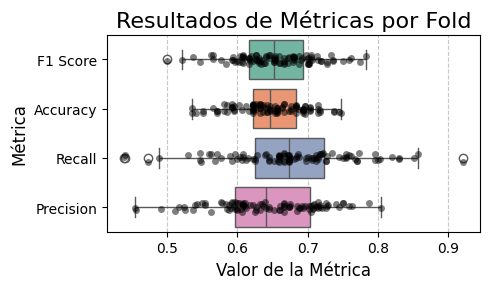

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Crear un DataFrame para las métricas de interés
metrics_df = pd.DataFrame({
    "F1 Score": metrics_["F1 Score"],
    "Accuracy": metrics_["Accuracy"],
    "Recall": metrics_["Recall"],
    "Precision": metrics_["Precision"]
})

# Configurar el gráfico
plt.figure(figsize=(5, 3))
sns.boxplot(data=metrics_df, orient="h", palette="Set2")
sns.stripplot(data=metrics_df, orient="h", color="black", alpha=0.5, jitter=True)

# Añadir detalles al gráfico
plt.title("Resultados de Métricas por Fold", fontsize=16)
plt.xlabel("Valor de la Métrica", fontsize=12)
plt.ylabel("Métrica", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [15]:
import numpy as np
import matplotlib.pyplot as plt

def graph_roc(metrics_, title='', treshold= 0.75, individual=True,avg=True, color_avg='#F24405'):
    """
    Genera un gráfico ROC con las métricas almacenadas en metrics_.
    """
    # Inicializar valores promedio
    metric_tpr_mean = np.zeros(100)
    auc_values = []
    acc_list, prec_list, f1_list, rec_list = [], [], [], []
    plt.figure(figsize=(4, 4))


    # Iterar sobre las métricas por fold
    for fold, auc_roc in enumerate(metrics_["AUC"]):
        if auc_roc < treshold:  # Umbral para ignorar curvas con AUC < 0.75
            continue

        # Interpolación de TPR y cálculo de AUC
        tpr = np.interp(np.linspace(0, 1, 100), metrics_["FPR"][fold], metrics_["TPR"][fold])
        metric_tpr_mean += tpr
        auc_values.append(auc_roc)

        if individual:

            # Graficar cada curva individual
            plt.plot(
                np.linspace(0, 1, 100), tpr,
                color='#747E7E', alpha=0.5, lw=0.7,
                label=None if len(metrics_["AUC"]) > 1 else f'AUC = {auc_roc:.2f}'
            )

        # Agregar métricas de evaluación por fold
        acc_list.append(metrics_["Accuracy"][fold])
        prec_list.append(metrics_["Precision"][fold])
        f1_list.append(metrics_["F1 Score"][fold])
        rec_list.append(metrics_["Recall"][fold])

    if avg:
        # Graficar la curva promedio si hay suficientes curvas válidas
        if auc_values:
            metric_tpr_mean /= len(auc_values)
            plt.plot(
                np.linspace(0, 1, 100), metric_tpr_mean,
                color=color_avg, lw=2, alpha=0.8,
                label=f'(AUC = {np.mean(auc_values):.2f} ± {np.std(auc_values):.2f})'
            )

    # Línea de referencia
    plt.plot([0, 1], [0, 1], 'k--', lw=1.5)

    # Configuración de los ejes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)

    # Título con métricas promedio
    plt.title(
        f'ROC Curve {title}\n'
        f'Acc={np.mean(acc_list):.2f} Prec={np.mean(prec_list):.2f} '
        f'F1={np.mean(f1_list):.2f} Rec={np.mean(rec_list):.2f}',
        fontsize=14
    )

    # Leyenda y mostrar gráfico
    plt.legend(loc="lower right", fontsize=10)
    #plt.grid(False, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()



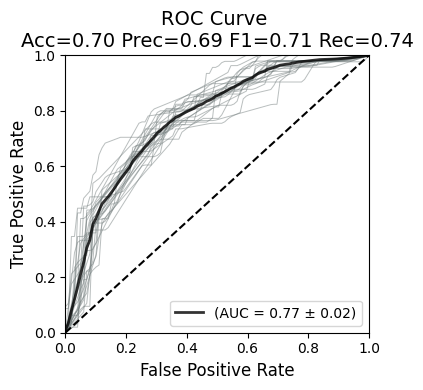

In [33]:
graph_roc(metrics_, title="", individual=True, color_avg= 'black',treshold=0.75)


In [34]:
len(metrics_['AUC'])

100

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def f_score(metrics_, title='', threshold=0.75, individual=True, avg=True, color_avg='#F24405', classes=[], colors=[]):
    f_scores_all = []

    # Recorre los 200 modelos
    for i in range(len(metrics_['AUC'])):
        if metrics_["AUC"][i] < threshold:  # Umbral para ignorar curvas con AUC < 0.75
            continue
        # Obtén los F-scores del modelo i
        f_scores = results_model['model'][i].get_booster().get_score()
        # Convierte el diccionario de F-scores en una lista y agrégala a f_scores_all
        f_scores_all.append(list(f_scores.values()))

    # Transforma la lista de listas en un arreglo de numpy para facilitar cálculos
    f_scores_array = np.array(f_scores_all)

    # Calcula el promedio y la desviación estándar de los F-scores por clase
    f_scores_avg = np.mean(f_scores_array, axis=0)
    f_scores_std = np.std(f_scores_array, axis=0)

    # Guarda los resultados en el formato requerido
    f_scores = list(f_scores_avg)
    f_score_std = list(f_scores_std)

    print("f_scores =", f_scores)  # Promedio de F-score por clase
    print("f_score_std =", f_score_std)  # Desviación estándar de F-score por clase

    # Si no se proporcionan clases, genera etiquetas por defecto (Feature 1, Feature 2, etc.)
    if not classes:
        classes = [f"Feature {i+1}" for i in range(len(f_scores))]

    # Si no se proporcionan colores, genera una paleta predeterminada
    if not colors:
        colors = plt.cm.viridis(np.linspace(0, 1, len(f_scores)))  # Usa una paleta de gradiente por defecto

    # 1. Gráfico de barras horizontal de F-score (Promedio y Desviación Estándar)
    plt.figure(figsize=(4, 4))
    plt.barh(classes, f_scores, xerr=f_score_std, capsize=5, color=colors, alpha=0.7)
    plt.ylabel('')
    plt.xlabel('F-score')
    plt.title(title if title else 'Promedio de F-score y Desviación Estándar')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()



f_scores = [208.49, 393.71, 238.03, 441.04]
f_score_std = [45.348317499109044, 90.32754784671174, 75.46263379978201, 44.856865695231086]


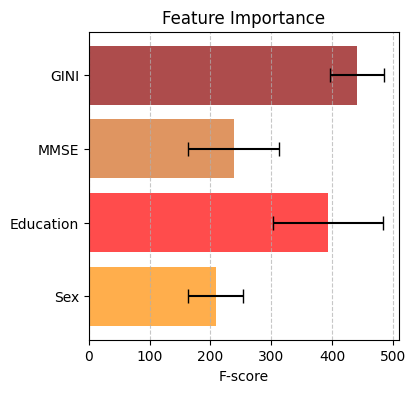

In [42]:
classes = ['Sex', 'Education', 'MMSE', 'GINI']

# Lista de colores personalizada
colors = ['darkorange', 'red', 'chocolate', 'darkred']  # Rojo, Naranja, Verde, Azul, Amarillo

# Llamar a la función
f_score(metrics_, title='Feature Importance', classes=classes, colors=colors,threshold=0.1)

In [61]:
metrics_

{'AUC': [0.7171160130718954,
  0.7279226240538268,
  0.6583226358579375,
  0.68561872909699,
  0.7533333333333333,
  0.6612244897959183,
  0.6973469387755102,
  0.7159516867971678,
  0.7420833333333333,
  0.6608333333333334,
  0.7289795918367348,
  0.7076023391812866,
  0.6146885521885521,
  0.6597484276729559,
  0.7511627906976744,
  0.6685808039376538,
  0.7038556193601313,
  0.7726324572382144,
  0.7163522012578616,
  0.7765327695560253,
  0.6648760330578513,
  0.7491816693944353,
  0.6987876254180603,
  0.6891948268669168,
  0.768603678929766,
  0.7745867768595041,
  0.6868770764119602,
  0.7424947145877379,
  0.7387755102040817,
  0.669601677148847,
  0.6885964912280702,
  0.7013093289689034,
  0.7117400419287212,
  0.765093537414966,
  0.7216666666666667,
  0.7281096563011457,
  0.6822649572649573,
  0.6654166666666667,
  0.7642886942010847,
  0.6505102040816326,
  0.686367558239862,
  0.597005742411813,
  0.6751353602665557,
  0.7544642857142857,
  0.7575,
  0.7602040816326532,


In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def C_Matrix(metrics_, title='', threshold=0.75, individual=True, avg=True, color_avg='#F24405', classes=[], colors=[]):
    temp_matrix = []

    # Recorre los 200 modelos
    for i in range(len(metrics_['AUC'])):
        if metrics_["AUC"][i] < threshold:  # Umbral para ignorar curvas con AUC < 0.75
            continue
        temp_matrix.append(metrics_["Confusion Matrix"][i])

    avg_conf_matrix = np.mean(np.array(temp_matrix), axis=0)
    classes_ = classes = ['Low', 'High']

    # Crear la figura
    plt.figure(figsize=(4, 3))
    sns.heatmap(avg_conf_matrix, annot=True, fmt='.2f', cmap='Greys', 
                cbar=True, linecolor='black', linewidths=1,
                xticklabels=classes_, yticklabels=classes,
                cbar_kws={'label': ''})
    
    plt.xlabel('Prediction')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()


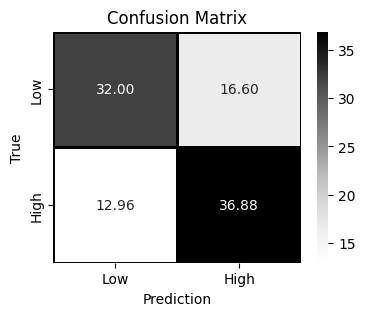

In [39]:
C_Matrix(metrics_)

In [33]:
import numpy as np

# Inicializa una lista para almacenar los F-scores de cada modelo
f_scores_all = []
temp_matrix = []

# Recorre los 200 modelos
for i in range(200):

    if metrics_["AUC"][i] < 0.75:  # Umbral para ignorar curvas con AUC < 0.75
            continue
    # Obtén los F-scores del modelo i
    f_scores = results_model['model'][i].get_booster().get_score()
    # Convierte el diccionario de F-scores en una lista y agrégala a f_scores_all
    f_scores_all.append(list(f_scores.values()))
    temp_matrix.append(metrics_["Confusion Matrix"][i])

# Transforma la lista de listas en un arreglo de numpy para facilitar cálculos
f_scores_array = np.array(f_scores_all)
    
# Calcula el promedio y la desviación estándar de los F-scores por clase
f_scores_avg = np.mean(f_scores_array, axis=0)
f_scores_std = np.std(f_scores_array, axis=0)

# Guarda los resultados en el formato requerido
f_scores = list(f_scores_avg)
f_score_std = list(f_scores_std)

print("f_scores =", f_scores)  # Promedio de F-score por clase
print("f_score_std =", f_score_std)  # Desviación estándar de F-score por clase

#avg_conf_matrix = np.mean(np.array(metrics_["Confusion Matrix"]), axis=0)
avg_conf_matrix = np.mean(np.array(temp_matrix), axis=0)




f_scores = [54.05882352941177, 214.58823529411765, 138.35294117647058, 201.11764705882354]
f_score_std = [6.1306423061947735, 8.905113029169463, 11.055694175510743, 8.587832383780155]


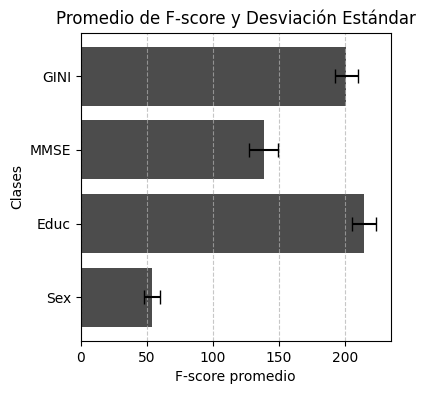

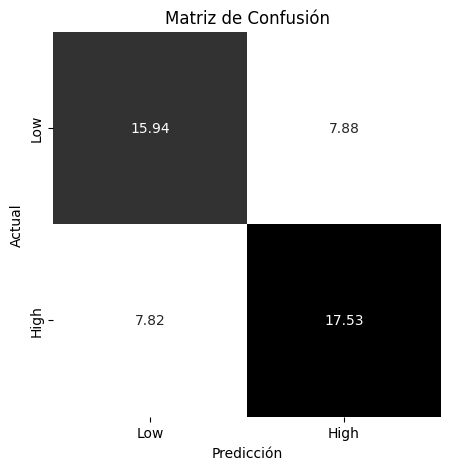

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Datos de ejemplo
#f_scores = [0.82, 0.78]  # Promedio de F-score por clase
#f_score_std = [0.04, 0.05]  # Desviación estándar de F-score por clase
classes = ['Sex', 'Educ', 'MMSE', 'GINI']

# Datos de la matriz de confusión
conf_matrix = avg_conf_matrix

# 1. Gráfico de barras horizontal de F-score (Promedio y Desviación Estándar)
plt.figure(figsize=(4, 4))
plt.barh(classes, f_scores, xerr=f_score_std, capsize=5, color='black', alpha=0.7)
plt.ylabel('Clases')
plt.xlabel('F-score promedio')
plt.title('Promedio de F-score y Desviación Estándar')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

classes_ = classes = ['Low', 'High']
# 2. Matriz de confusión
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='.2f', cmap='Greys', cbar=False,
            xticklabels=classes_, yticklabels=classes)
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()
